In [96]:
import ccxt
import pandas as pd

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
import calendar 

In [98]:
# Read data, get dataframe with crimes/month
df = pd.read_parquet('C:\\Users\\20212397\\Desktop\\Y2Q4\\DC2\\Metropolitan-street.parquet')
# Filter the DataFrame to only include rows where the LSOA name is 'Barnet' and the Crime type is 'Burglary'
filtered_df = df[(df['LSOA name'].str.contains('Barnet')) & (df['Crime type'].str.contains('Burglary'))]

# Do something with the filtered DataFrame
filtered_df.head()

# i want to get from the Month column of filtered_df the month and year and add two new columns named Month num and Year

# create a new column named Month num and extract the month number from the Month column
filtered_df['Month num'] = filtered_df['Month'].str[5:7]

# create a new column named Year and extract the year from the Month column
filtered_df['Year'] = filtered_df['Month'].str[0:4]

# convert the Month num and Year columns to numeric values
filtered_df['Month num'] = pd.to_numeric(filtered_df['Month num'])
filtered_df['Year'] = pd.to_numeric(filtered_df['Year'])

# sort the DataFrame by the Year and then Month num columns
# filtered_df = filtered_df.sort_values(by=['Year', 'Month num'])

# create a new column named Month name and convert the Month num column to the month name
filtered_df['Month name'] = filtered_df['Month num'].apply(lambda x: calendar.month_abbr[x])


monthly_grouped_df = filtered_df.sort_values(['Year','Month num'],ascending=False).groupby(['Year', 'Month num'])['Crime ID'].count()
monthly_grouped_df = monthly_grouped_df.to_frame()


# Rename columns, select rows with data and set datetime index
monthly_grouped_df = monthly_grouped_df.rename(columns = {'Crime ID':'nr of burglaries'})
monthly_grouped_df['day'] = 1
monthly_grouped_df = monthly_grouped_df.reset_index()
monthly_grouped_df = monthly_grouped_df[(monthly_grouped_df['Year']>2011) | ((monthly_grouped_df['Year'] == 2011) & (monthly_grouped_df['Month num']==12))]
monthly_grouped_df = monthly_grouped_df.rename(columns={'Month num': 'month', 'Year': 'year'})
monthly_grouped_df['Date'] = pd.to_datetime(monthly_grouped_df[['year', 'month', 'day']])
monthly_grouped_df = monthly_grouped_df.set_index(pd.DatetimeIndex(monthly_grouped_df['Date']))
monthly_grouped_df['ds'] = monthly_grouped_df['Date']
monthly_grouped_df['y'] = monthly_grouped_df['nr of burglaries']

C:\Users\20212397\AppData\Local\Temp\ipykernel_26256\3999933064.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Month num'] = filtered_df['Month'].str[5:7]
C:\Users\20212397\AppData\Local\Temp\ipykernel_26256\3999933064.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Year'] = filtered_df['Month'].str[0:4]
C:\Users\20212397\AppData\Local\Temp\ipykernel_26256\3999933064.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

In [129]:
monthly_grouped_df

,year,month,nr of burglaries,day,Date,ds,y
Date,,,,,,,
2011-12-01,2011,12,439,1,2011-12-01,2011-12-01,439
2012-01-01,2012,1,437,1,2012-01-01,2012-01-01,437
2012-02-01,2012,2,424,1,2012-02-01,2012-02-01,424
2012-03-01,2012,3,432,1,2012-03-01,2012-03-01,432
2012-04-01,2012,4,310,1,2012-04-01,2012-04-01,310
...,...,...,...,...,...,...,...
2022-11-01,2022,11,246,1,2022-11-01,2022-11-01,246
2022-12-01,2022,12,228,1,2022-12-01,2022-12-01,228
2023-01-01,2023,1,242,1,2023-01-01,2023-01-01,242


In [99]:
# Divide test and train data
train_data = monthly_grouped_df[monthly_grouped_df['year']<2018]
test_data = monthly_grouped_df[(monthly_grouped_df['year']>2017) & (monthly_grouped_df['year'] <2020)]
test_data['ds'] = test_data['Date']
train_data['ds'] = train_data['Date']
test_data['y'] = test_data['nr of burglaries']
train_data['y'] = train_data['nr of burglaries']
train_data

C:\Users\20212397\AppData\Local\Temp\ipykernel_26256\4256134342.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['ds'] = test_data['Date']
C:\Users\20212397\AppData\Local\Temp\ipykernel_26256\4256134342.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['ds'] = train_data['Date']
C:\Users\20212397\AppData\Local\Temp\ipykernel_26256\4256134342.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

,year,month,nr of burglaries,day,Date,ds,y
Date,,,,,,,
2011-12-01,2011,12,439,1,2011-12-01,2011-12-01,439
2012-01-01,2012,1,437,1,2012-01-01,2012-01-01,437
2012-02-01,2012,2,424,1,2012-02-01,2012-02-01,424
2012-03-01,2012,3,432,1,2012-03-01,2012-03-01,432
2012-04-01,2012,4,310,1,2012-04-01,2012-04-01,310
...,...,...,...,...,...,...,...
2017-08-01,2017,8,309,1,2017-08-01,2017-08-01,309
2017-09-01,2017,9,259,1,2017-09-01,2017-09-01,259
2017-10-01,2017,10,305,1,2017-10-01,2017-10-01,305


In [135]:
test_data.shape

(24, 2)

In [100]:
# Extract the relevant columns from the dataset
train_data = train_data[['ds', 'y']]
test_data = test_data[['ds', 'y']]

In [101]:
import tensorflow as tf
import sklearn
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional

In [102]:
# Normalize the data using MinMaxScaler:
scaler = MinMaxScaler()
train_data['y'] = scaler.fit_transform(train_data[['y']])
test_data['y'] = scaler.transform(test_data[['y']])


C:\Users\20212397\AppData\Local\Temp\ipykernel_26256\1213160809.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['y'] = scaler.fit_transform(train_data[['y']])


In [229]:
# Convert the data to sequences for LSTM input:

def create_sequences(data, sequence_length):
    X = []
    y = []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i+sequence_length])
        y.append(data[i+sequence_length])
    return np.array(X), np.array(y)

sequence_length = 12  # Adjust as needed
X_train, y_train = create_sequences(train_data['y'], sequence_length)
X_test, y_test = create_sequences(test_data['y'], sequence_length)

In [230]:
# Build and train the LSTM model:
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=60, batch_size=10)

Epoch 1/60
7/7 [==============================] - 1s 4ms/step - loss: 0.1300
Epoch 2/60
7/7 [==============================] - 0s 4ms/step - loss: 0.0863
Epoch 3/60
7/7 [==============================] - 0s 4ms/step - loss: 0.0536
Epoch 4/60
7/7 [==============================] - 0s 4ms/step - loss: 0.0342
Epoch 5/60
7/7 [==============================] - 0s 4ms/step - loss: 0.0270
Epoch 6/60
7/7 [==============================] - 0s 5ms/step - loss: 0.0263
Epoch 7/60
7/7 [==============================] - 0s 5ms/step - loss: 0.0271
Epoch 8/60
7/7 [==============================] - 0s 5ms/step - loss: 0.0268
Epoch 9/60
7/7 [==============================] - 0s 5ms/step - loss: 0.0263
Epoch 10/60
7/7 [==============================] - 0s 5ms/step - loss: 0.0258
Epoch 11/60
7/7 [==============================] - 0s 4ms/step - loss: 0.0265
Epoch 12/60
7/7 [==============================] - 0s 5ms/step - loss: 0.0252
Epoch 13/60
7/7 [==============================] - 0s 4ms/step - loss: 0.

In [231]:
# Make predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

1/1 [==============================] - 0s 22ms/step


In [232]:
# rescale predictions to the original scale
train_predictions = scaler.inverse_transform(train_predictions)
test_predictions = scaler.inverse_transform(test_predictions)

In [233]:
# rescale the expected output to the original scale 
y_train = scaler.inverse_transform([y_train])
y_test = scaler.inverse_transform([y_test])

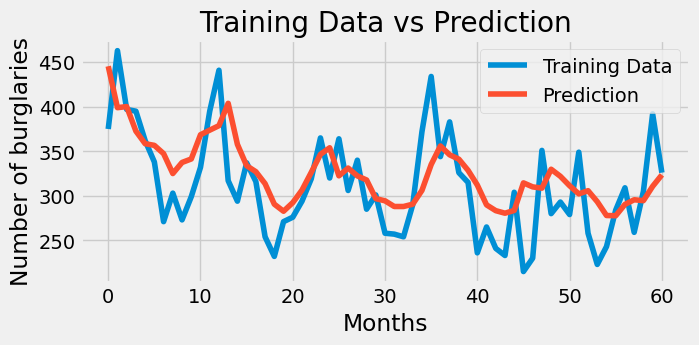

In [239]:
# Plot the predictions vs the expected output on the training data using the dummy variables for the month

plt.figure(figsize=(7, 3))
plt.plot(y_train[0], label='Training Data')
plt.plot(train_predictions[:,0], label='Prediction')
plt.title('Training Data vs Prediction')
# add labels to the axes
plt.xlabel('Months')
plt.ylabel('Number of burglaries')


plt.legend()
plt.show()


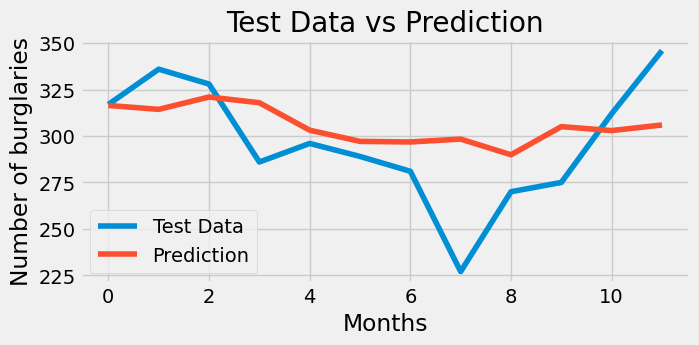

In [240]:
# Plot the predictions vs the expected output on the test data

plt.figure(figsize=(7, 3))
plt.plot(y_test[0], label='Test Data')
plt.plot(test_predictions[:,0], label='Prediction')
plt.title('Test Data vs Prediction')
# add labels to the axes
plt.xlabel('Months')
plt.ylabel('Number of burglaries')
plt.legend()
plt.show()

#dummy vars on the months (12 months so 1 dummy vars)



In [241]:
# Calculate the Mean Absolute Error of the predictions on the test data
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test[0], test_predictions[:,0])


21.8814697265625

In [242]:
# Calculate the Root Mean Squared Error of the predictions on the test data
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test[0], test_predictions[:,0]))


28.838673904538183

In [243]:
# Calculate the Mean Absolute Percentage Error of the predictions on the test data
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
mean_absolute_percentage_error(y_test[0], test_predictions[:,0])

7.913492119582448